In [222]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [223]:
# Load dataset
df = pd.read_csv('/Users/kevinnguyen/Downloads/CS-M148/Predicting_Diabetes/diabetes.csv')

# Display the first few rows of the dataset to ensure data is successfully imported
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [224]:
# Encode categorical variables
df['smoking_history'] = df['smoking_history'].replace({
    'never': 1, 'not current': 2, 'former': 3, 'current': 4, 'ever': 5, 'No Info': 6
})
df['gender'] = LabelEncoder().fit_transform(df['gender'])

# Define features and target
X = df.iloc[:, 1:8]
y = df['diabetes']

# Normalize the numeric features
scaler = StandardScaler()
X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
)

# Display the first few rows of the preprocessed data
print("Data preprocessing completed.")
X.head()

Data preprocessing completed.


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1.692704,0,1,1,-0.321056,1.001706,0.047704
1,0.538006,0,0,6,-0.000116,1.001706,-1.426210
2,-0.616691,0,0,1,-0.000116,0.161108,0.489878
3,-0.261399,0,0,4,-0.583232,-0.492690,0.416183
4,1.515058,1,1,4,-1.081970,-0.679490,0.416183


In [225]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Print the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (80000, 7)
Testing set shape: (20000, 7)


In [226]:
# Build Neural Network (with L2 and Dropout Regularization)

# Learning Rate
learning_rate = 0.0009
optimizer = Adam(learning_rate=learning_rate)

# Define the neural network architecture
model = Sequential()

# Input layer and first hidden layer with L2 regularization and Dropout
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu', kernel_regularizer = l2(0.005)))
model.add(Dropout(0.1))

# Second hidden layer with L2 regularization and Dropout
model.add(Dense(64, activation = 'relu', kernel_regularizer = l2(0.006)))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 128)               1024      
_________________________________________________________________
dropout_90 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_91 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 65        
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


In [227]:
# Training the model
history = model.fit(X_train, y_train, epochs = 50, batch_size = 25, validation_split = 0.1)

# Print the training history keys
print("Training completed.")
print(f"History keys: {history.history.keys()}")

Epoch 1/50
2880/2880 [==============================] - 3s 1ms/step - loss: 0.1815 - accuracy: 0.9557 - val_loss: 0.1343 - val_accuracy: 0.9586
Epoch 2/50
2880/2880 [==============================] - 3s 1ms/step - loss: 0.1332 - accuracy: 0.9599 - val_loss: 0.1376 - val_accuracy: 0.9570
Epoch 3/50
2880/2880 [==============================] - 3s 962us/step - loss: 0.1293 - accuracy: 0.9618 - val_loss: 0.1305 - val_accuracy: 0.9616
Epoch 4/50
2880/2880 [==============================] - 3s 898us/step - loss: 0.1263 - accuracy: 0.9632 - val_loss: 0.1269 - val_accuracy: 0.9625
Epoch 5/50
2880/2880 [==============================] - 3s 937us/step - loss: 0.1236 - accuracy: 0.9642 - val_loss: 0.1245 - val_accuracy: 0.9625
Epoch 6/50
2880/2880 [==============================] - 3s 1ms/step - loss: 0.1217 - accuracy: 0.9655 - val_loss: 0.1199 - val_accuracy: 0.9640
Epoch 7/50
2880/2880 [==============================] - 3s 986us/step - loss: 0.1196 - accuracy: 0.9660 - val_loss: 0.1163 - val_a

In [228]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.45).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print accuracy and recall
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

Accuracy: 0.97115
Recall: 0.6633489461358314


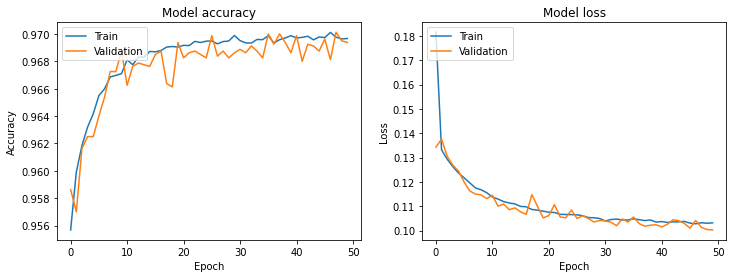

In [229]:
# Visualizations

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [230]:
# Save Trained Model
model.save('diabetes_prediction_model.h5')